## Guided Project: Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, you'll be cleaning and exploring the data set in Jupyter notebook.

In [106]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [107]:
# remove all rows where responded id is null
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
# confirming null rows were removed
star_wars['RespondentID'].isnull().value_counts()

False    1186
Name: RespondentID, dtype: int64

In [108]:
# Convert 'Have you seen any of the 6 films in the Star Wars franchise?' to a Boolean column type
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)


Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [109]:
# create a dictionary to map th values
yes_no = {'Yes' : True, 'No': False}
# apply boolean result to the column
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)  

In [110]:
# confirm change was made correctly
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [111]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [112]:
# map the other column to boolean 
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']= star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [113]:
# verify that the count is correct
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

For columns which ask if the respondent has seen the movie we need to change those to true or false values.  In this case a NaN will be converted to False.  Then we will change the column names to make them more readable.

In [114]:
star_wars['Unnamed: 8'].value_counts(dropna=False)

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64

In [115]:
movie_name = {'Star Wars: Episode I  The Phantom Menace': True, 
np.nan: False,            
'Star Wars: Episode II  Attack of the Clones': True,
'Star Wars: Episode III  Revenge of the Sith' : True,
'Star Wars: Episode IV  A New Hope' : True,
'Star Wars: Episode V The Empire Strikes Back' : True,
'Star Wars: Episode VI Return of the Jedi': True,
    } 

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_name)

In [116]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [117]:
# rename all the columns
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [118]:
# Convert columns [9:15] to floats from strings
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [119]:
star_wars = star_wars.rename(columns = 
{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
       'Unnamed: 10': 'ranking_2', 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4', 'Unnamed: 13': 'ranking_5',
       'Unnamed: 14' : 'ranking_6'
})

In [120]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [121]:
# calculate the mean of each of the ranking columns
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

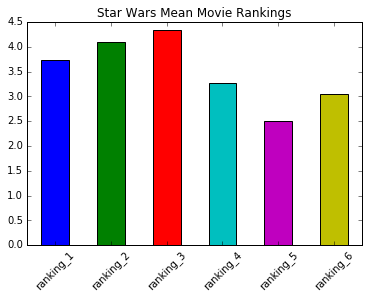

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

# plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
# plt.title('Star Wars Mean Movie Rankings')
# plt.show()

star_wars[star_wars.columns[9:15]].mean().plot.bar(title='Star Wars Mean Movie Rankings', rot=45)

### Rankings
So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

In [123]:
# I stopped here on step 7

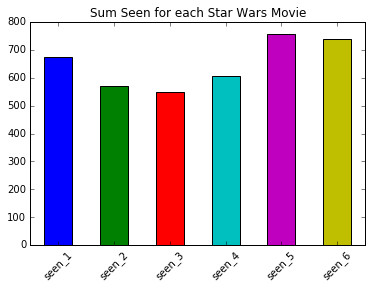

In [124]:
# sum up the number of respondents which saw the moview snd plot it out.
star_wars[star_wars.columns[3:9]].sum()
star_wars[star_wars.columns[3:9]].sum().plot.bar(title='Sum Seen for each Star Wars Movie', rot=45)

### View Counts
The number of respondents which have seen the movies clearly identifies a trend where the first three movies have been seen by the highest number of survey respondents.  This pattern correlates with the movie rankings examined earlier.

In [125]:
# males = star_wars[star_wars['Gender']]
star_wars['Gender'].value_counts(dropna=False)
males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']

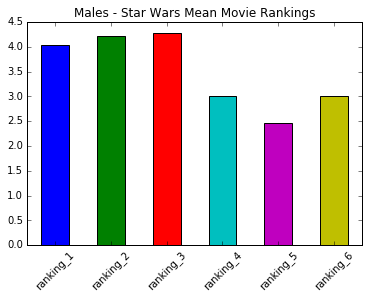

In [126]:
# male highest ranked movie
males[males.columns[9:15]].mean().plot.bar(title='Males - Star Wars Mean Movie Rankings', rot=45)

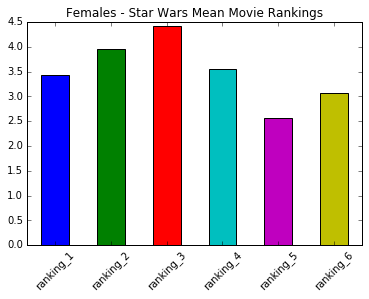

In [127]:
# male highest ranked movie
females[females.columns[9:15]].mean().plot.bar(title='Females - Star Wars Mean Movie Rankings', rot=45)

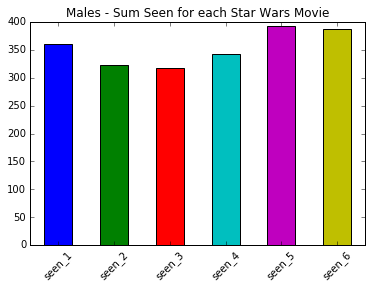

In [128]:
males[males.columns[3:9]].sum().plot.bar(title='Males - Sum Seen for each Star Wars Movie', rot=45)

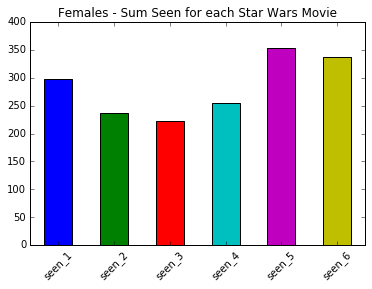

In [129]:
females[females.columns[3:9]].sum().plot.bar(title='Females - Sum Seen for each Star Wars Movie', rot=45)

### Male/Female differences in favorite Star Wars movie and most seen movie

Interestingly, more males watched episodes 1-3, but males liked them far less than females did.


In [130]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [131]:
star_wars['Unnamed: 16'].value_counts()
# star_wars[star_wars.columns[15:29]].head()

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int64